# Exercise 9.2 Everyone was friends before the Brexit

In [93]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import collections
import csv
from math import factorial
%matplotlib inline

## 1. 
Import and draw the network (if the visibility is poor, try different layouts or save the plot to zoom into different regions of the network). (4P)

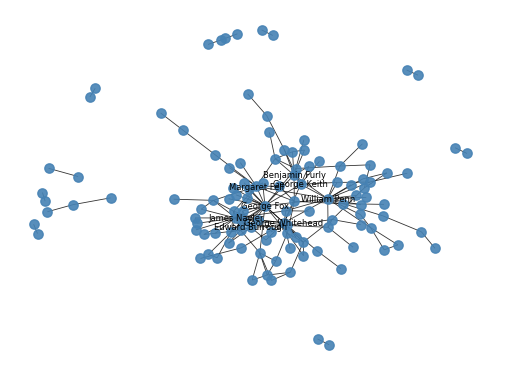

In [98]:
MyNodeList = pd.read_csv('quakers_nodelist.csv')
MyEdgeList = pd.read_csv('quakers_edgelist.csv')

node = MyNodeList['Name']
edge = list(zip(MyEdgeList['Source'], MyEdgeList['Target']))

G0 = nx.Graph()
G0.add_nodes_from(node)
G0.add_edges_from(edge)


pos = nx.spring_layout(G0, seed=42, k=0.3, iterations=100)
top_nodes = sorted(G0.degree, key=lambda x: x[1], reverse=True)[:8]
labels = {n: n for n, d in top_nodes}

nx.draw_networkx_nodes(
    G0, pos,
    node_size=45,
    node_color="steelblue",
    alpha=0.9
)

nx.draw_networkx_edges(
    G0, pos,
    alpha=0.8,
    width=0.6
)

nx.draw_networkx_labels(
    G0, pos,
    labels,
    font_size=6,
    font_color="black"
)

plt.xlim(-1.1, 1.0)
plt.ylim(-1.1, 1.1)
plt.axis("off")
plt.show()


## 2.
Compute and plot the degree distribution of the network. Based on the visual appearance of the degree distribution, can you relate it to a certain network type? (3P)

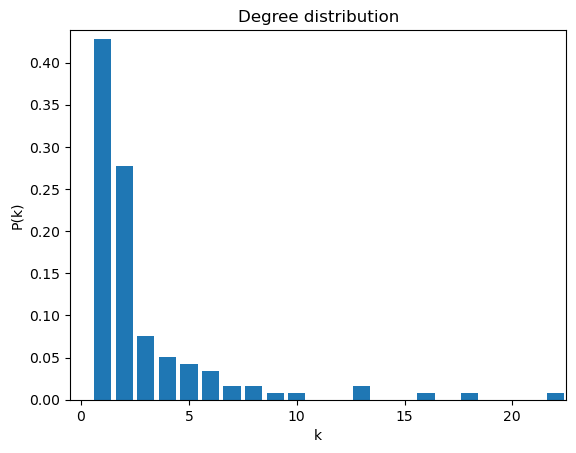

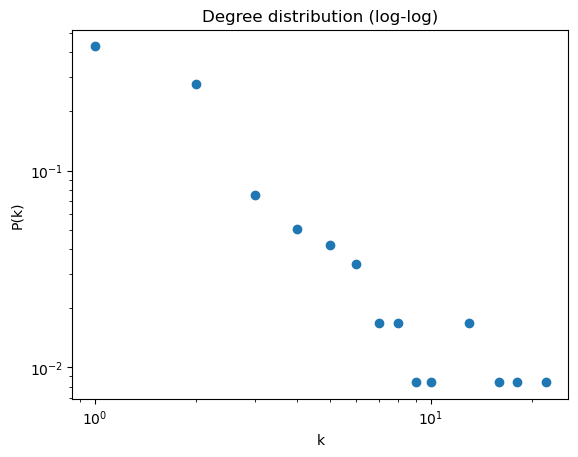

In [113]:

N = G0.number_of_nodes() # Number of nodes
deg_seq = sorted([deg for node, deg in G0.degree()], reverse=True) # sorting each node's degree in order of large - small
deg_count = collections.Counter(deg_seq) # counting number of each degree number (how many nodes have this degree?)
k_list, cnt = zip(*deg_count.items()) # making touples (degree, count number of nodes which have this degree number)
Pk = [_/N for _ in cnt] # each degree's probability  = count nodes of this degree / total number of nodes

# histogram
plt.bar(k_list, Pk, width=0.8, color="C0")
plt.xlabel("k")
plt.ylabel("P(k)")
plt.title("Degree distribution")
plt.xlim([-0.5, max(k_list)+0.5])
plt.ylim([0, max(Pk)+0.01])
plt.show()

#scatter log-log
k = np.array(k_list)
Pk_arr = np.array(Pk)

mask = (k > 0) & (Pk_arr > 0)
k = k[mask]
Pk_arr = Pk_arr[mask]

plt.scatter(k, Pk)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("k")
plt.ylabel("P(k)")
plt.title("Degree distribution (log-log)")
plt.show()

From the degree distribution, It seems to have relation with Preferential attachment model (Barabási-Albert - G(n, m)model) : Scale-free network.
Because power low appears in degree distribution. Most of nodes have lower degree(around 0) but only small number of nodes have larger degrees.

## 3.
How dense and structured is the social network? Compute the density and transitivity of the network. Interpret the results. (3P)

- Density is the ratio of actual edges in the network to all possible edges in the network. (scaled from 0 to 1) 
- Transitivity is the ratio of all triangles over all possible triangles. (scaled from 0 to 1) 

In [115]:
density = nx.density(G0)
triadic_closure = nx.transitivity(G0)
print("Network density:", density)
print("Triadic closure:", triadic_closure)

Network density: 0.02478279447372169
Triadic closure: 0.16937799043062202


Network density is 0.024, it is not a dense network. It is a very sparse social network.
Transitivity is 0.169, there are not many triangles in this network, this number represents relationships that may exist but currently do not.

## Bonus 1.
Find the top 20 most popular Quakers in the social network. What’s the network metric that is associated with this result? Is there a related way of quantifying this attribute of a network? (3P)


In [123]:
from operator import itemgetter

degree_dict = dict(G0.degree(G0.nodes()))
nx.set_node_attributes(G0, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key= itemgetter(1), reverse=True)

print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('George Fox', 22)
('William Penn', 18)
('James Nayler', 16)
('George Whitehead', 13)
('Margaret Fell', 13)
('Benjamin Furly', 10)
('Edward Burrough', 9)
('George Keith', 8)
('Thomas Ellwood', 8)
('Francis Howgill', 7)
('John Perrot', 7)
('John Audland', 6)
('Richard Farnworth', 6)
('Alexander Parker', 6)
('John Story', 6)
('John Stubbs', 5)
('Thomas Curtis', 5)
('John Wilkinson', 5)
('William Caton', 5)
('Anthony Pearson', 5)


Related Network metric : Centrality. 

There are several methods to quantify centrality of network, but we have otehr way like considering both number of degrees and number of connected hubs.

## Bonus 2.
Compute the diameter of the network.
Hint: nx.diameter() and nx.is_connected() will help you. (5P)

Diameter is the length of the path between the two nodes that are furthest apart. It can be used to interpret how big is the network’s overall size.

In [129]:
# print(nx.diameter(G0)) - error because there are components that is not connected
print(nx.is_connected(G0)) # False
components = nx.connected_components(G0)
largest_component = max(components, key=len)
subgraph = G0.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

False
Network diameter of largest component: 8
